In [37]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import random
import pandas as pd
import time

In [38]:
df = pd.read_excel('5gene.xlsx')
ge_original = np.array(df)
n = len(ge_original[1])
t = len(ge_original)
ge_original
CR = 0.5
F = 0.2


In [128]:
A =np.array([ 5,10,10,8,10])
B = np.array([ 10,10,10,10,10])
g = np.array([[ 0,0,1,0,-1],
        [2,0,0,0,0],
        [ 0,-1,0,0,0 ],
        [0,0,2,0,-1],
        [0,0,0,2,0]])
h= np.array([[2,0,0,0,0],
        [0,2,0,0,0],
        [0,-1,2,0,0],
        [ 0,0,0,2,0],
        [ 0,0,0,0,2]])

In [97]:
A = np.array([ ,  2, 10, 18,  0])
B = np.array([15,  4,  0, 14, 17])
g = np.array([[-1,  2,  1, -2, -1],
        [-3,  0,  0,  0,  0],
        [ 0,  2,  0,  0, -2],
        [ 0,  2,  1,  0, -2],
        [-2,  0,  0,  0, -1]])
h = np.array([[ 0,  2,  0, -1,  0],
        [ 0,  1,  2, -1,  0],
        [-1,  2,  1,  1,  1],
        [ 1,  1,  0,  2,  1],
        [ 2, -3,  0,  1,  2]])
A

array([ 6,  2, 10, 18,  0])

<h1> Differential Evolutionary Algorithm for Gene Regulatory Network of 5 Genes <h1>
<img src="ssystemequation.png"><img>

In [132]:
def calc_dydt(alpha, beta, g, h, exp ):
    
    #exp is the gene expression of the previous time step
    
    
    #print(alpha,'*',exp[0],'^',g[0],'*',exp[1],'^',g[1],'*',exp[2],'^',g[2],'*',exp[3],'^',g[3],'*',exp[4],'^',g[4])
    
    Generation = alpha * (np.prod(pow(exp,g)))
    Degeneration = beta* (np.prod(pow(exp,h)))
    
    return (Generation-Degeneration)
    
def calc_ge(p):
    #p --> learning parameters as a dictionary 
    
    #t -->is the length of time stamp
    #n --> number of Genes
    #init--> gene expression for time step 1
    
    original = ge_original.copy()
    ge_calc = [original[0]]
    H=0.001 #step size
    ge_spline = [original[0]]
    
    for i in range((t-1)*10):
     
    
        #tb = H*i
       #linear spline interpolation
        #ta = tb+2*(H) #only if the data is uniform
        
        #t_now = (i+1)*H #the current time step 
        
        #X_ta = original[i].copy()
        #X_tb = original[i+2].copy()
        
        
        #print(tb,ta,i,i+2)
        
        #X_t = X_tb + (((X_ta-X_tb)/(ta-tb))*(t_now-tb))
        
        #ge_spline.append(X_t)
        
        single_exp=[]
        #original
        #print("original")
        #print(ge_original[i])
        #print("after change---------")
        for j in range(n):
            
            #print(original[i][j])
            
            #ge_temp = ge_spline[i].copy()
            
            #ge_temp = ge_original[i].copy()
            
            ge_temp = ge_calc[i].copy()
            
            #print("for Gene ", j)
            value = ge_calc[i][j].copy()
            #ge_temp[j]=value
            
            #print(ge_temp==ge_original[i])
            
            k1 = calc_dydt(A[j],B[j],g[j],h[j],ge_temp)
            #print(h)
            #print(ge_temp+k1*H*0.5)
            k2 = calc_dydt(A[j],B[j],g[j],h[j],ge_temp+(H*0.5*k1))
            k3 = calc_dydt(A[j],B[j],g[j],h[j],ge_temp+(H*0.5*k2))
            k4 = calc_dydt(A[j],B[j],g[j],h[j],ge_temp+(k3*H))
            next_step = value + ((1/6)*(k1+2*k2+2*k3+k4)*H)
            #next_step = value + (k1*H)

            #rangeKutta Method call
            
            
            
            
            
            single_exp.append(next_step)
            
        ge_calc.append(single_exp)
        
        
        
    ge_calc = np.array(ge_calc)
    ge=[]
    for x in range(len(ge_calc)):
        if(x%10==0):
            ge.append(ge_calc[x])
    ge = np.array(ge)
    return(ge)

In [133]:
ge_calculated = calc_ge(random_population())
ge_calculated

array([[0.7       , 0.12      , 0.14      , 0.16      , 0.18      ],
       [0.75534568, 0.16929286, 0.63146541, 0.23276752, 0.18001024],
       [0.88653048, 0.23189715, 0.84269071, 0.45757829, 0.18766958],
       [1.01284103, 0.3148902 , 0.92183812, 0.72577232, 0.21803753],
       [1.09200186, 0.41359456, 0.95453629, 0.93915616, 0.28148278],
       [1.11938905, 0.51580569, 0.97036292, 1.06771326, 0.3726299 ],
       [1.11143642, 0.60997031, 0.97919328, 1.12817674, 0.47659793],
       [1.08482055, 0.68951195, 0.98468674, 1.14607851, 0.57944312],
       [1.05026371, 0.75239688, 0.98838406, 1.14037999, 0.67221231],
       [1.01369047, 0.79936194, 0.9910153 , 1.12277809, 0.75065341],
       [0.97815424, 0.83246043, 0.99296296, 1.10004546, 0.81377536]])

In [138]:
#data = ge_calculated.copy()
ts = np.array([x/10 for x in range(11)]) #number of time points
new = ge_calculated
len(ts)

11

In [135]:
#Initialization of the population

def random_population():
    learning_parameters = {'A': np.random.randint(low=0, high=20, size=(n,)), 
                           'B': np.random.randint(low=0, high=20, size=(n,)), 
                           'g': np.random.randint(low=-3, high=3, size=(n,n)),
                           'h': np.random.randint(low=-3, high=3, size=(n,n))}
    return learning_parameters

len(org)

10

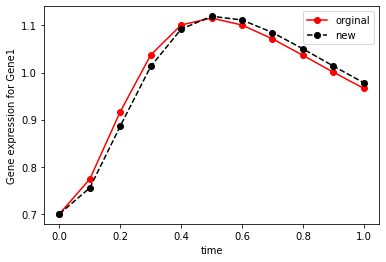

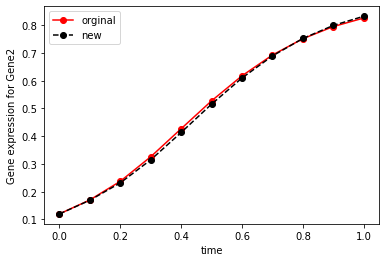

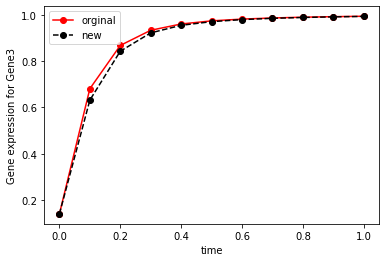

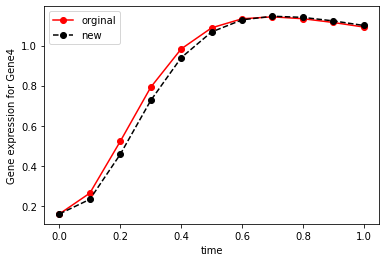

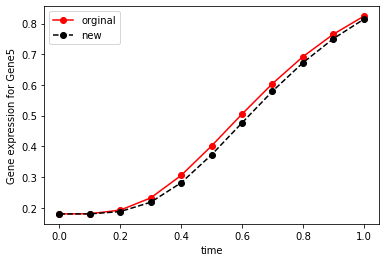

In [140]:
for i in range(5):
    #plt.plot(ts, decoupled_RK[:,i], marker='o', color='black', linestyle='dashed'  )
    plt.plot(ts, ge_original[:,i], marker='o', color='red')
    
    plt.plot(ts, ge_calculated[:,i], marker='o', color='black',linestyle='dashed' )
    plt.xlabel('time')
    plt.ylabel('Gene expression for Gene'+str(i+1))
    plt.legend(('orginal',"new"))
    plt.show()

In [91]:
len(as_it_is_range_kutta)

10

In [29]:
ge_temp[1]=0

In [30]:
ge_temp

array([0.77413, 0.     , 0.68072, 0.2638 , 0.18058])

In [25]:
import pandas as pd
new_df = pd.read_excel("tomiga5gene.xlsx")

In [14]:
(new_df["1"][0].split(" "))

0.10470153657506627

In [26]:
List1 = []
List2 = []
List3 = []
List4 = []
List5 = []



for i in range(len(new_df)):
    all_genes = new_df["1"][i].split(" ")
    List1.append(float(all_genes[0]))
    List2.append(float(all_genes[1]))
    List3.append(float(all_genes[2]))
    List4.append(float(all_genes[3]))
    List5.append(float(all_genes[4]))
    

In [27]:
new_df[1]=List1
new_df[2]=List2
new_df[3]=List3
new_df[4]=List4
new_df[5]=List5

In [28]:
new_df = new_df.drop("1",axis=1)

In [29]:
new_df

,1,2,3,4,5
0,0.104702,0.263853,0.150949,0.494833,0.333220
1,0.408607,0.261597,0.619939,0.455378,0.380959
2,0.828747,0.412337,0.857983,0.459271,0.404653
3,1.093030,0.728959,0.948384,0.626243,0.453797
4,1.198795,1.007998,0.980938,0.913700,0.617423
5,1.224519,1.151575,0.992880,1.059914,0.847831
6,1.225400,1.203499,0.997329,1.082354,0.993860
7,1.222922,1.217840,0.998997,1.073520,1.048428
8,1.221527,1.220756,0.999623,1.065261,1.061415
9,1.221096,1.221080,0.999859,1.061555,1.062304
